cuda
512


<IPython.core.display.Javascript object>


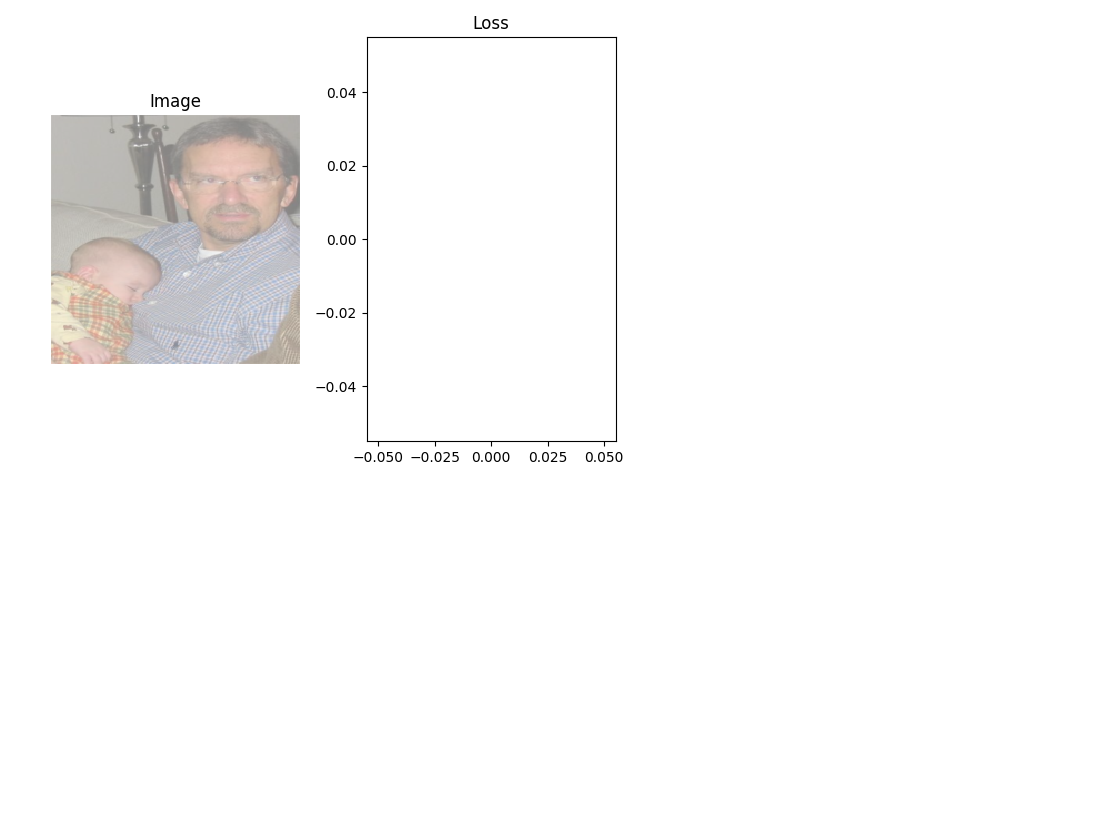

Start/Continue training from epoch 0


/opt/conda/lib/python3.6/site-packages/torch/nn/_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


In [ ]:
%matplotlib notebook

import os
import numpy as np
import torch
import torch.nn as nn
import torch.utils.data as td
import torch.nn.functional as F
import torchvision as tv
from PIL import Image
import nntools as nt
import matplotlib.pyplot as plt
from dataloader import VOCDataset, myimshow
import model
class statsmanager(nt.StatsManager):
    def __init__self():
        super(statsmanager,self).__init__()

    def init(self):
        super(statsmanager,self).init()
        self.m_ap=0

    def accumulate(self,loss,x,y,d):
        #Do m_ap calculations
        super(statsmanager,self).accumulate(loss,x,y,d)


    def summarize(self):
        loss=super(statsmanager,self).summarize()
        return {'loss':loss}

def plot(self,fig,ax1, ax2 ,im):
    ax1.set_title('Image')
    x,y=train_set[0]
    myimshow(x,ax=ax1)
    ax2.set_title('Loss')
    ax2.plot([exp1.history[k]['loss']for k in range(exp1.epoch)])
    plt.tight_layout()
    fig.canvas.draw()

lr=1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
vgg = model.Resnet18Transfer(num_classes=20,n_batch=4)
vgg.to(device)
adam=torch.optim.Adam(vgg.parameters(),lr=lr)
stats_manager=statsmanager()
#train_set=VOCDataset('../VOCdevkit/VOC2012/')
#valid_set=VOCDataset('../VOCdevkit/VOC2012/', mode="val")
train_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012')
valid_set=VOCDataset('/datasets/ee285f-public/PascalVOC2012', mode="val")
x,y=train_set[0]
exp1=nt.Experiment(vgg,train_set,valid_set,adam,stats_manager,batch_size=4,output_dir="runres",perform_validation_during_training=True)
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1)
exp1.run(num_epochs=5,plot=lambda exp:plot(exp,fig=fig,ax1=ax1, ax2=ax2 ,im=x))